In [1]:
!pip install seaborn

In [2]:
!pip install --upgrade pandas-gbq

In [3]:
!pip install --upgrade db-dtypes

pip install pandas
    ```
*   **Google Cloud SDK or Authentication:** You need a way to authenticate with Google Cloud so your Python script can access BigQuery. The most common ways are:
    *   **Google Cloud SDK:** If you have the Google Cloud SDK installed and configured (`gcloud init`), Pandas will often pick up your credentials automatically.
    *   **Service Account Key:** You can create a service account in Google Cloud, download its JSON key file, and point to it in your code.

**Step-by-Step Instructions:**

1.  **Import Necessary Libraries:**
    You'll need `pandas` for data manipulation and `google.cloud.bigquery` to interact with BigQuery.

    ```python
    import pandas as pd
    from google.cloud import bigquery
    ```

2.  **Initialize a BigQuery Client:**
    This client will be used to execute your SQL query against BigQuery.

    ```python
    # If you have the Google Cloud SDK configured, this should work.
    # Otherwise, you might need to specify your project ID explicitly
    # or set the GOOGLE_APPLICATION_CREDENTIALS environment variable
    # to the path of your service account key file.
    client = bigquery.Client()
    ```

    *   **If you're using a service account key:**
        ```python
        # Replace 'path/to/your/service_account_key.json' with the actual path
        client = bigquery.Client.from_service_account_json('path/to/your/service_account_key.json')
        ```
    *   **If you need to specify the project ID:**
        ```python
        # Replace 'your-gcp-project-id' with your actual Google Cloud Project ID
        client = bigquery.Client(project='your-gcp-project-id')
        ```

3.  **Define Your SQL Query:**
    Store your corrected GoogleSQL query in a Python string variable.

    ```python
    sql_query = """
    SELECT
      -- From order_items
      i.order_id,
      i.order_item_id,
      i.product_id,
      i.seller_id,
      i.shipping_limit_date,
      i.price,
      i.freight_value,

      -- From order_payments
      p.payment_sequential,
      p.payment_type,
      p.payment_installments,
      p.payment_value,

      -- From order_customers
      c.customer_id,
      c.customer_unique_id,
      c.customer_zip_code_prefix,
      c.customer_city,
      c.customer_state
    FROM `durable-ripsaw-477914-g0`.`brazil`.`olist_order_items` AS i
    LEFT JOIN `durable-ripsaw-477914-g0`.`brazil`.`olist_order_payments` AS p
      ON i.order_id = p.order_id
    LEFT JOIN `durable-ripsaw-477914-g0`.`brazil`.`olist_orders` AS o
      ON i.order_id = o.order_id
    LEFT JOIN `durable-ripsaw-477914-g0`.`brazil`.`olist_customers` AS c
      ON o.customer_id = c.customer_id
    """
    ```
    *   **Important:** Make sure the table names (`durable-ripsaw-477914-g0.brazil.olist_order_items`, etc.) are correct for your BigQuery project.

4.  **Execute the Query and Load into a Pandas DataFrame:**
    The `pd.read_gbq()` function is a convenient way to directly load query results from BigQuery into a DataFrame.


In [4]:
import pandas as pd
from google.cloud import bigquery
import seaborn as sns

import matplotlib.pyplot as plt

/home/pingh/miniconda3/envs/eltn/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.18) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [5]:
# Replace 'path/to/your/service_account_key.json' with the actual path
client = bigquery.Client.from_service_account_json('durable-ripsaw-477914-g0-206ef3866e00.json')

In [6]:
sql_query = """
    SELECT
      -- From order_items
      i.order_id,
      i.order_item_id,
      i.product_id,
      i.seller_id,
      i.shipping_limit_date,
      i.price,
      i.freight_value,

      -- From order_payments
      p.payment_sequential,
      p.payment_type,
      p.payment_installments,
      p.payment_value,

      -- From order_customers
      c.customer_id,
      c.customer_unique_id,
      c.customer_zip_code_prefix,
      c.customer_city,
      c.customer_state
    FROM `durable-ripsaw-477914-g0`.`brazil`.`olist_order_items` AS i
    LEFT JOIN `durable-ripsaw-477914-g0`.`brazil`.`olist_order_payments` AS p
      ON i.order_id = p.order_id
    LEFT JOIN `durable-ripsaw-477914-g0`.`brazil`.`olist_orders` AS o
      ON i.order_id = o.order_id
    LEFT JOIN `durable-ripsaw-477914-g0`.`brazil`.`olist_customers` AS c
      ON o.customer_id = c.customer_id
    """

In [7]:
pip install db-dtypes pandas-gbq --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:

import pandas_gbq
import db_dtypes
import pandas as pd
sql_query = """
    SELECT
      -- From order_items
      i.order_id,
      i.order_item_id,
      i.product_id,
      i.seller_id,
      i.shipping_limit_date,
      i.price,
      i.freight_value,

      -- From order_payments
      p.payment_sequential,
      p.payment_type,
      p.payment_installments,
      p.payment_value,

      -- From order_customers
      c.customer_id,
      c.customer_unique_id,
      c.customer_zip_code_prefix,
      c.customer_city,
      c.customer_state
    FROM `durable-ripsaw-477914-g0`.`ecommerce`.`olist_order_items` AS i
    LEFT JOIN `durable-ripsaw-477914-g0`.`ecommerce`.`olist_order_payments` AS p
      ON i.order_id = p.order_id
    LEFT JOIN `durable-ripsaw-477914-g0`.`ecommerce`.`olist_orders` AS o
      ON i.order_id = o.order_id
    LEFT JOIN `durable-ripsaw-477914-g0`.`ecommerce`.`olist_customers` AS c
      ON o.customer_id = c.customer_id
    """
df = pd.read_gbq(sql_query, project_id='durable-ripsaw-477914-g0', dialect='standard')

print(df.head())


                           order_id order_item_id  \
0  0017afd5076e074a48f1f1a4c7bac9c5             1   
1  0039500db36d50d7d0bfaf23723550f3             1   
2  009e11afa25aa95ae78e60a793995c9b             1   
3  00c47fefb9a49baec12ab3654d7f548e             1   
4  00d94e8901b75ee0d6ef1f87f947b666             1   

                         product_id                         seller_id  \
0  fe59a1e006df3ac42bf0ceb876d70969  25c5c91f63607446a97b143d2d535d31   
1  62984ea1bba7fcea1f5b57084d3bf885  c3cfdc648177fdbbbb35635a37472c53   
2  519f3a4ea67cdce4923fbc76badd6bd2  582d4f8675b945722eda7c0cb61ba4c7   
3  f196248e8b5d060cca414a664ea9a76f  91f0eec23d4a61d7d7caeefa3f0ad1ca   
4  a35a9f46dcee0a67c8c7ad8493eb4135  85d9eb9ddc5d00ca9336a2219c97bb13   

   shipping_limit_date  price freight_value payment_sequential payment_type  \
0  2017-04-24 22:25:19  809.1         44.29                  1  credit_card   
1  2018-07-10 10:51:09  169.9         33.33                  1  credit_card   
2  20

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   order_id                  117604 non-null  object
 1   order_item_id             117604 non-null  object
 2   product_id                117604 non-null  object
 3   seller_id                 117604 non-null  object
 4   shipping_limit_date       117604 non-null  object
 5   price                     117604 non-null  object
 6   freight_value             117604 non-null  object
 7   payment_sequential        117601 non-null  object
 8   payment_type              117601 non-null  object
 9   payment_installments      117601 non-null  object
 10  payment_value             117601 non-null  object
 11  customer_id               117604 non-null  object
 12  customer_unique_id        117604 non-null  object
 13  customer_zip_code_prefix  117604 non-null  object
 14  cust

In [10]:
print(df.isna().sum())

order_id                    0
order_item_id               0
product_id                  0
seller_id                   0
shipping_limit_date         0
price                       0
freight_value               0
payment_sequential          3
payment_type                3
payment_installments        3
payment_value               3
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [11]:
print(df[df.isna().any(axis=1)])

                                order_id order_item_id  \
105097  bfbd0f9bdef84302105ad712db648a6c             2   
105098  bfbd0f9bdef84302105ad712db648a6c             3   
105099  bfbd0f9bdef84302105ad712db648a6c             1   

                              product_id                         seller_id  \
105097  5a6b04657a4c5ee34285d1e4619a96b4  ecccfa2bb93b34a3bf033cc5d1dcdc69   
105098  5a6b04657a4c5ee34285d1e4619a96b4  ecccfa2bb93b34a3bf033cc5d1dcdc69   
105099  5a6b04657a4c5ee34285d1e4619a96b4  ecccfa2bb93b34a3bf033cc5d1dcdc69   

        shipping_limit_date  price freight_value payment_sequential  \
105097  2016-09-19 23:11:33  44.99          2.83               None   
105098  2016-09-19 23:11:33  44.99          2.83               None   
105099  2016-09-19 23:11:33  44.99          2.83               None   

       payment_type payment_installments payment_value  \
105097         None                 None          None   
105098         None                 None          Non

In [12]:
import pandas as pd
import numpy as np

numeric_like_cols = []

for col in df.columns:
    converted = pd.to_numeric(df[col], errors="coerce")
    
    # If at least 90% of values are numeric → treat it as numeric column
    ratio_numeric = converted.notna().mean()
    
    if ratio_numeric > 0.9:
        numeric_like_cols.append(col)

numeric_like_cols


['order_item_id',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'customer_zip_code_prefix']

In [13]:
df.loc[:, numeric_like_cols] = df[numeric_like_cols].apply(
    pd.to_numeric, errors="coerce"
)

df.dtypes

order_id                    object
order_item_id               object
product_id                  object
seller_id                   object
shipping_limit_date         object
price                       object
freight_value               object
payment_sequential          object
payment_type                object
payment_installments        object
payment_value               object
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix    object
customer_city               object
customer_state              object
dtype: object

In [14]:
df_clean = df.dropna(subset=numeric_like_cols)


Shape after cleaning: (117601, 4)
Any NA left? price                   False
freight_value           False
payment_value           False
payment_installments    False
dtype: bool
                         price  freight_value  payment_value  \
price                 1.000000       0.415809       0.739501   
freight_value         0.415809       1.000000       0.373891   
payment_value         0.739501       0.373891       1.000000   
payment_installments  0.278645       0.186020       0.274131   

                      payment_installments  
price                             0.278645  
freight_value                     0.186020  
payment_value                     0.274131  
payment_installments              1.000000  


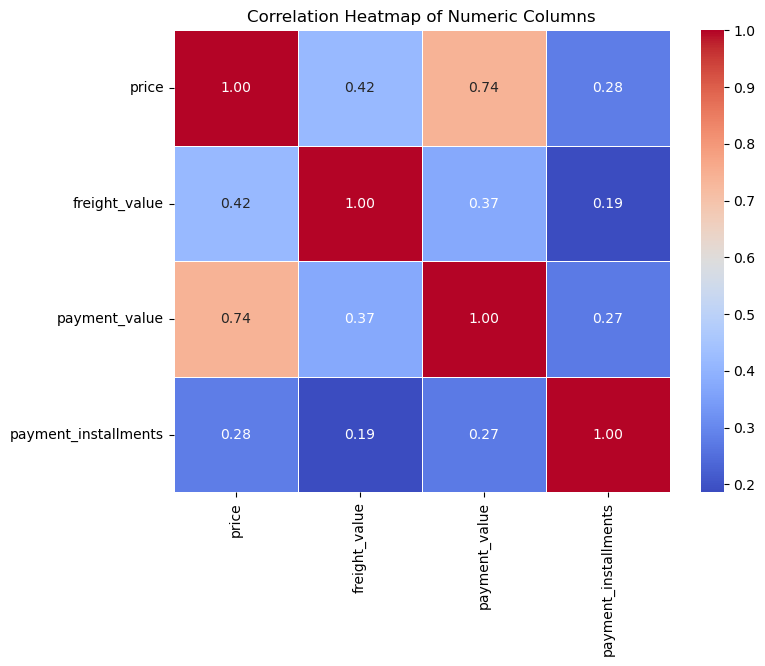

In [17]:
# 1. Choose the columns you want correlations for (adjust as needed)
numeric_like_cols = [
    'price',
    'freight_value',
    'payment_value',
    'payment_installments'
    # add more numeric columns here if you have them
]

# 2. Build a numeric-only DataFrame
#    - select those columns
#    - convert strings to numbers
df_numeric = df[numeric_like_cols].apply(pd.to_numeric, errors='coerce')

# 3. Drop rows with NA in those numeric columns
df_numeric_clean = df_numeric.dropna()

print("Shape after cleaning:", df_numeric_clean.shape)
print("Any NA left?", df_numeric_clean.isna().any())

# 4. Now compute correlation matrix safely
correlation_matrix = df_numeric_clean.corr()
print(correlation_matrix)

# 5. Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()



In [19]:
# === STEP 1: Define numeric columns you want ===
numeric_like_cols = [
    'price',
    'freight_value',
    'payment_value',
    'payment_installments'
]

# === STEP 2: Convert selected columns to numeric ===
df_numeric = df[numeric_like_cols].apply(pd.to_numeric, errors='coerce')

# === STEP 3: Drop rows with NA in these numeric columns ===
df_numerical_no_na = df_numeric.dropna()

print("Shape of numeric dataframe:", df_numerical_no_na.shape)
print(df_numerical_no_na.head())


Shape of numeric dataframe: (117601, 4)
    price  freight_value  payment_value  payment_installments
0  809.10          44.29         853.39                  10.0
1  169.90          33.33         203.23                   2.0
2   30.99          34.15          65.14                   1.0
3  199.00          67.69         266.69                   4.0
4   27.90          20.80          97.40                   9.0


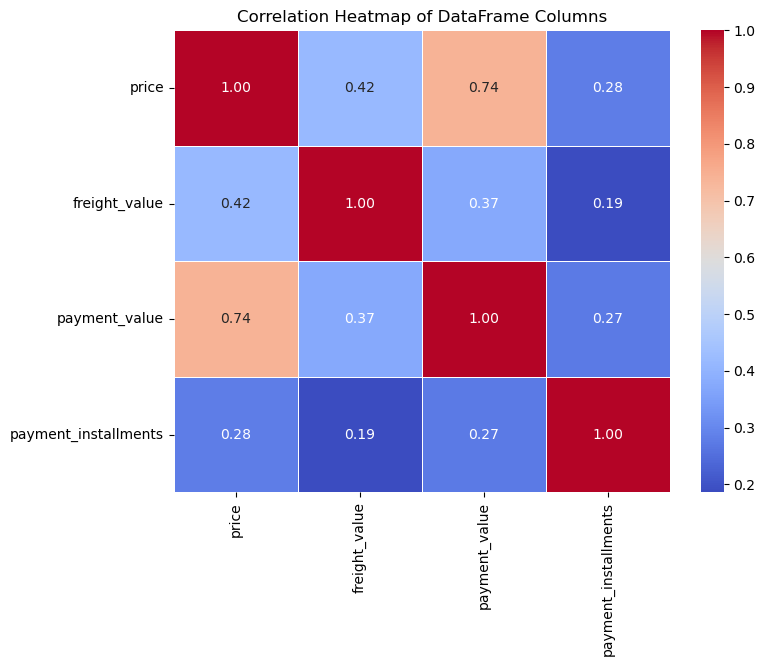

In [20]:
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()

In [21]:
df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.1,44.29,1.0,credit_card,10.0,853.39,8085a9af46f619bc25966f151a362b0d,98758d88bf4b8eef1372ddee45d63178,57250,campo alegre,AL
1,0039500db36d50d7d0bfaf23723550f3,1,62984ea1bba7fcea1f5b57084d3bf885,c3cfdc648177fdbbbb35635a37472c53,2018-07-10 10:51:09,169.9,33.33,1.0,credit_card,2.0,203.23,90bd9911aed064dfc625750fbd83ebca,77971c2442b1adbbe0448409df2ea56a,57041,maceio,AL
2,009e11afa25aa95ae78e60a793995c9b,1,519f3a4ea67cdce4923fbc76badd6bd2,582d4f8675b945722eda7c0cb61ba4c7,2017-10-26 00:15:00,30.99,34.15,1.0,credit_card,1.0,65.14,1b7c152aba1c7478309329cfec0bb5d1,b3c1bc5b24affd7cfb96752860b44640,69044,manaus,AM
3,00c47fefb9a49baec12ab3654d7f548e,1,f196248e8b5d060cca414a664ea9a76f,91f0eec23d4a61d7d7caeefa3f0ad1ca,2017-12-13 00:18:33,199.0,67.69,1.0,credit_card,4.0,266.69,411373e81bbd24b0356ca1274e9c03fe,c555d42202667b1e09e50e7667b6a663,68908,macapa,AP
4,00d94e8901b75ee0d6ef1f87f947b666,1,a35a9f46dcee0a67c8c7ad8493eb4135,85d9eb9ddc5d00ca9336a2219c97bb13,2017-05-08 14:25:13,27.9,20.8,1.0,credit_card,9.0,97.4,9d797a1a7d8ddb192708608d25197161,53f34954c078f5034197993c0e109b95,57303,arapiraca,AL
5,00d94e8901b75ee0d6ef1f87f947b666,2,a35a9f46dcee0a67c8c7ad8493eb4135,85d9eb9ddc5d00ca9336a2219c97bb13,2017-05-08 14:25:13,27.9,20.8,1.0,credit_card,9.0,97.4,9d797a1a7d8ddb192708608d25197161,53f34954c078f5034197993c0e109b95,57303,arapiraca,AL
6,00d9ac423c9ad6781c0ed04e87666691,1,6cdd53843498f92890544667809f1595,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-10-13 12:07:19,349.9,29.3,1.0,credit_card,3.0,379.2,64a495213f59f3050ccd2ed250d88dde,0cc2ee1112a11a1094eff52fa2e87150,64006,teresina,PI
7,00ef7ed06a55243f3e6a9d373a89eb14,1,d6bbda35f0b8505c2f824f1d90295855,fa40cc5b934574b62717c68f3d678b6d,2018-01-18 17:31:10,54.99,21.18,1.0,credit_card,1.0,76.17,30c93f8296b9a02c0eec5de60b94f98c,16156a86625a02a82bf1cd39de12a4ea,69043,manaus,AM
8,00f7c5b41250e0126ced62d612ff4711,1,583f158587cdecda3e8bdea694021e39,955fee9216a65b617aa5c0531780ce60,2018-01-18 02:35:28,45.0,35.67,1.0,boleto,1.0,80.67,3c5aa62fbe268c0beee7bf98386b421a,8a64013cee18edf9edbc21b0dd9acec4,64260,piripiri,PI
9,01094e169d4b14edaf6954eeddb83633,1,b5e13c9a353102f79c6206ff5cb61a50,a49928bcdf77c55c6d6e05e09a9b4ca5,2017-10-03 14:07:10,79.9,28.96,1.0,credit_card,1.0,108.86,2b7ad3fc92af63027a7748b084f9b439,d2787622df9fd933c164f7cf696a4e2a,77405,gurupi,TO


In [22]:
!pip install scikit-learn xgboost

  Using cached scikit_learn-1.7.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
Using cached scikit_learn-1.7.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/115.9 MB ? eta -:--:--Downloading xgboost-3.1.2-py3-none-manylinux_2_28_x86_64.whl (115.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 16.7 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 16.7 MB/s eta 0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using ca

In [24]:
# Choose the columns we need for the model
TARGET = 'freight_value'
NUMERICAL_FEATURES = ['price', 'payment_value', 'customer_zip_code_prefix']
CATEGORICAL_FEATURES = ['customer_state']

FEATURE_COLS = NUMERICAL_FEATURES + CATEGORICAL_FEATURES + [TARGET]

# 1. Keep only the columns needed for modelling
df_model = df[FEATURE_COLS].copy()

# 2. Convert numeric columns to numbers (they are often object in Olist)
df_model[NUMERICAL_FEATURES] = df_model[NUMERICAL_FEATURES].apply(
    pd.to_numeric, errors='coerce'
)

# 3. Drop rows with missing values in any of these columns
df_no_na = df_model.dropna()

print("Shape after cleaning:", df_no_na.shape)
print(df_no_na.head())


Shape after cleaning: (117601, 5)
    price  payment_value  customer_zip_code_prefix customer_state  \
0  809.10         853.39                     57250             AL   
1  169.90         203.23                     57041             AL   
2   30.99          65.14                     69044             AM   
3  199.00         266.69                     68908             AP   
4   27.90          97.40                     57303             AL   

  freight_value  
0         44.29  
1         33.33  
2         34.15  
3         67.69  
4          20.8  


In [25]:
# ==============================================================================
# 1. IMPORTS AND SETUP
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Assumes df_no_na is already loaded and cleaned from previous steps in your notebook
# If not, use the following:
# df_no_na = df.dropna().copy()

# Define Target and Features
TARGET = 'freight_value'
NUMERICAL_FEATURES = ['price', 'payment_value', 'customer_zip_code_prefix']
CATEGORICAL_FEATURES = ['customer_state']

# Create the Feature Matrix (X) and Target Vector (y)
X = df_no_na[NUMERICAL_FEATURES + CATEGORICAL_FEATURES]
y = df_no_na[TARGET]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 94080
Testing samples: 23521


In [26]:
# ==============================================================================
# 2. PREPROCESSING PIPELINE
# ==============================================================================

# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer to apply different transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL_FEATURES),
        ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ],
    remainder='drop'  # Drop any columns not specified
)

In [27]:
# ==============================================================================
# 3. PERFORMANCE EVALUATION FUNCTION
# ==============================================================================
def evaluate_model(model_name, y_true, y_pred):
    """Calculates and prints key regression performance metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"--- {model_name} Performance ---")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * 40)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

In [28]:
# ==============================================================================
# 4. MODEL 1: LINEAR REGRESSION (BASELINE)
# ==============================================================================
print("Starting Linear Regression (Baseline) Training...")

# Create the full pipeline for Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
lr_metrics = evaluate_model("Linear Regression (Baseline)", y_test, y_pred_lr)

Starting Linear Regression (Baseline) Training...
--- Linear Regression (Baseline) Performance ---
Root Mean Squared Error (RMSE): 13.07
Mean Absolute Error (MAE): 6.67
R-squared (R2): 0.2853
----------------------------------------
--- Linear Regression (Baseline) Performance ---
Root Mean Squared Error (RMSE): 13.07
Mean Absolute Error (MAE): 6.67
R-squared (R2): 0.2853
----------------------------------------


In [29]:
# ==============================================================================
# 5. MODEL 2: GRADIENT BOOSTING REGRESSOR (XGBoost)
# ==============================================================================
print("Starting XGBoost Regressor Training...")

# Use default XGBoost parameters for a quick test
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,  # Number of boosting rounds
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1, # Use all available cores
    tree_method='hist' # Faster tree construction
)

# Create the full pipeline for XGBoost
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_regressor)
])

# Train the model
# Note: XGBoost is generally robust to scaling, but we keep the scaler in the pipeline
# for a consistent comparison with Linear Regression.
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
xgb_metrics = evaluate_model("XGBoost Regressor", y_test, y_pred_xgb)

Starting XGBoost Regressor Training...
--- XGBoost Regressor Performance ---
Root Mean Squared Error (RMSE): 9.36
Mean Absolute Error (MAE): 3.90
R-squared (R2): 0.6334
----------------------------------------
--- XGBoost Regressor Performance ---
Root Mean Squared Error (RMSE): 9.36
Mean Absolute Error (MAE): 3.90
R-squared (R2): 0.6334
----------------------------------------
